In [1]:
import datetime
from collections import defaultdict
import json
import os
import matplotlib.pyplot as plt
import pylab
import re
import numpy as np

In [2]:
import plotting_utils
import seaborn as sns

plotting_utils.setup_plotting_params()

In [3]:
OUTPUT_PATH = "../benchmark_output/runs/openai_runtimes_over_time"

In [4]:
def get_per_instance_runtimes(per_instance_metrics):
    runtimes = []
    for values in per_instance_metrics.values():
        for metric in values:
            if metric["name"]["name"] == "inference_runtime":
                runtimes.append(metric["values"][0])
    return runtimes

In [5]:
data = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))
metric_dirs = os.listdir(OUTPUT_PATH)
pattern = (
    f"synthetic_efficiency:tokenizer=huggingface_gpt2,"
    f"num_input_tokens=(\d+),"
    f"num_output_tokens=(\d+),"
    f"random=(.*),"
    f"model=(.*)"
)
for metric_dir in metric_dirs:
    match = re.match(pattern, metric_dir)
    if match is None:
        continue
    num_input_tokens = int(match.group(1))
    num_output_tokens = int(match.group(2))
    random = match.group(3)
    model = match.group(4).replace("_", "/")
    month, day, year = random.split("_")
    date = datetime.datetime(year=int(year), month=int(month), day=int(day))
    path = os.path.join(OUTPUT_PATH, metric_dir, "per_instance_stats.json")
    if os.path.exists(path):
        with open(path, "r") as f:
            per_instance_metrics = json.load(f)
            per_instance_runtimes = get_per_instance_runtimes(per_instance_metrics)
    else:
        per_instance_runtimes = [None]
    data[model][num_input_tokens][num_output_tokens][date] = per_instance_runtimes

openai/davinci, 1 input_tokens


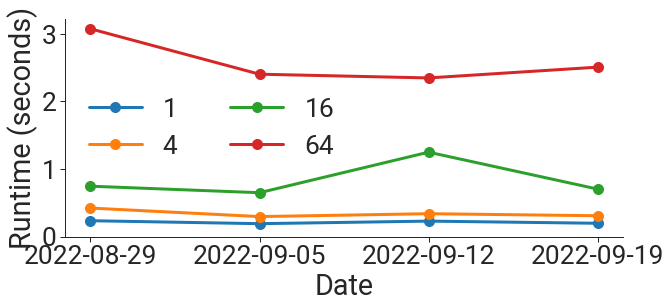

openai/davinci, 256 input_tokens


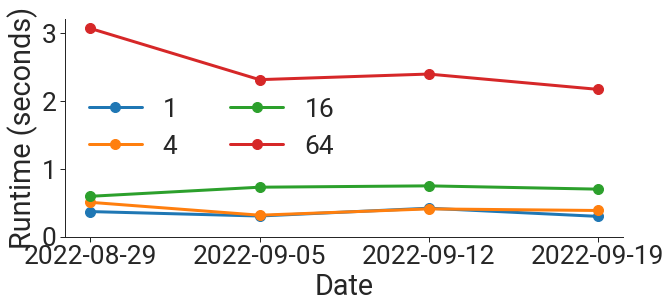

openai/davinci, 512 input_tokens


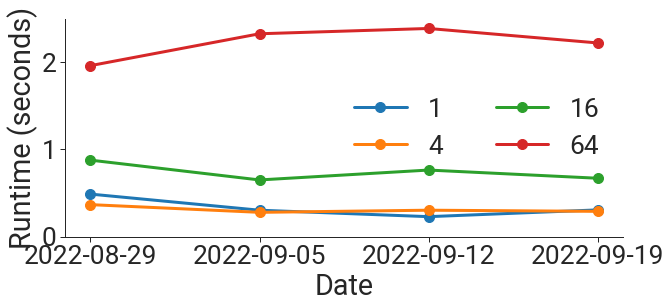

openai/davinci, 1024 input_tokens


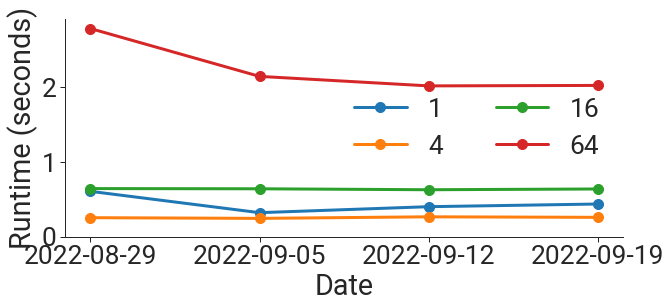

openai/davinci, 1536 input_tokens


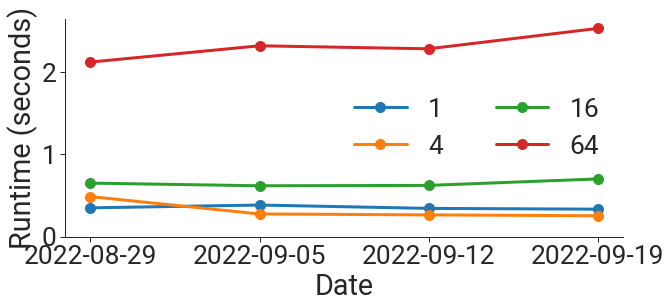

openai/text-davinci-002, 1 input_tokens


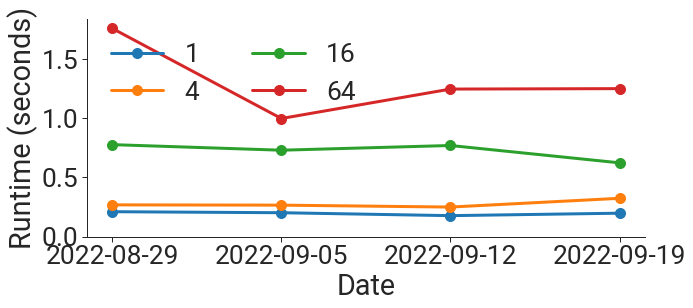

openai/text-davinci-002, 256 input_tokens


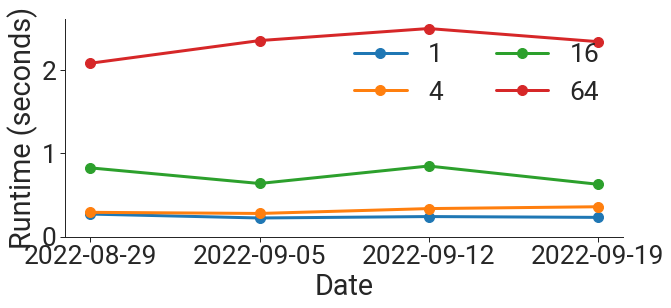

openai/text-davinci-002, 512 input_tokens


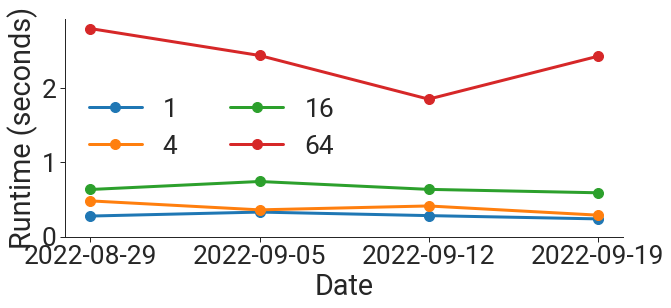

openai/text-davinci-002, 1024 input_tokens


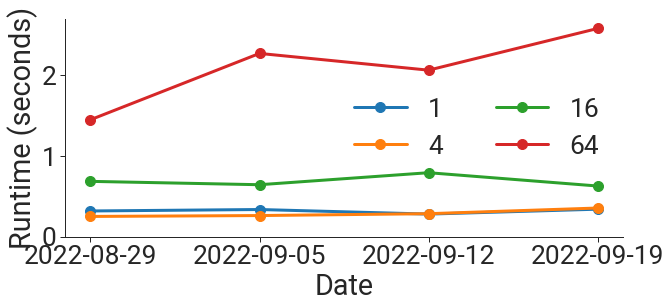

openai/text-davinci-002, 1536 input_tokens


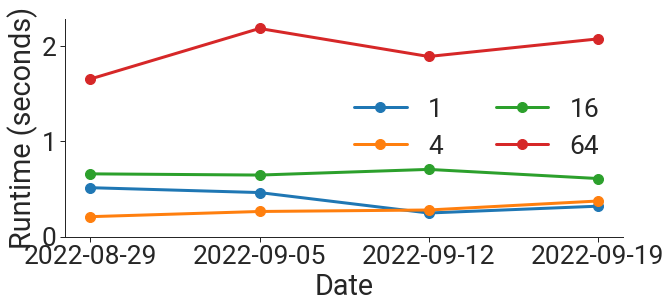

openai/curie, 1 input_tokens


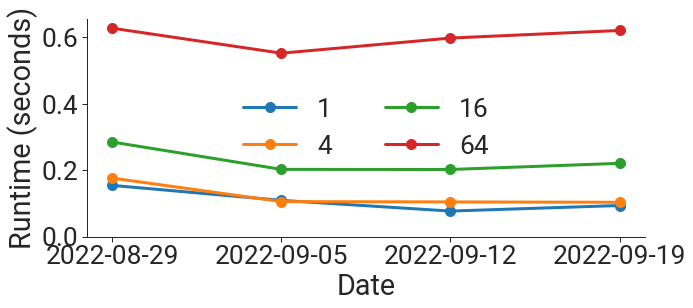

openai/curie, 256 input_tokens


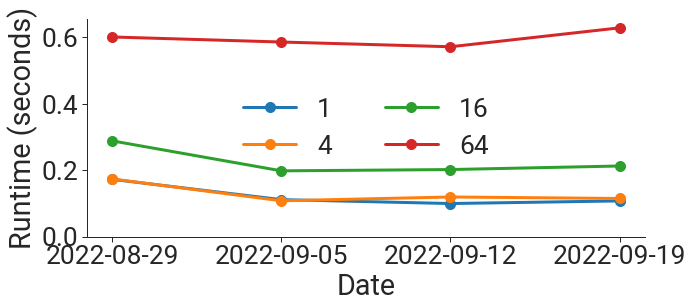

openai/curie, 512 input_tokens


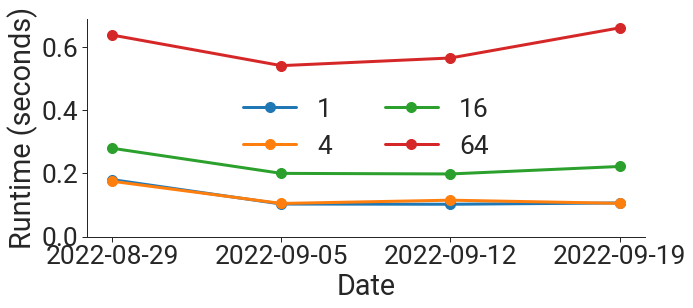

openai/curie, 1024 input_tokens


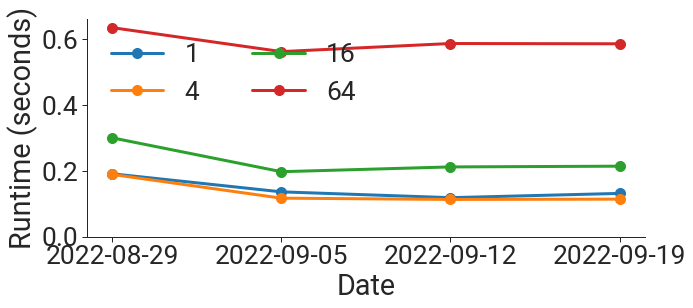

openai/curie, 1536 input_tokens


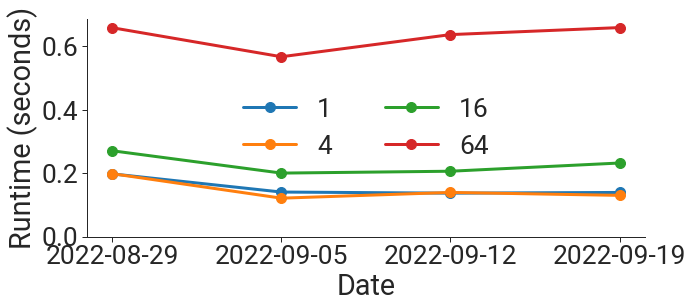

openai/text-davinci-001, 1 input_tokens


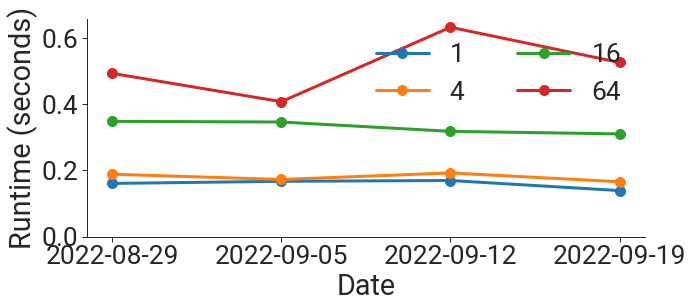

openai/text-davinci-001, 256 input_tokens


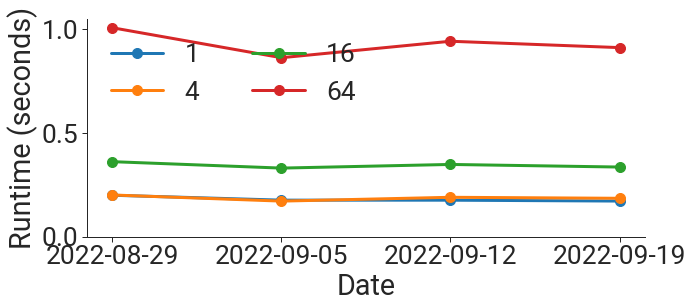

openai/text-davinci-001, 512 input_tokens


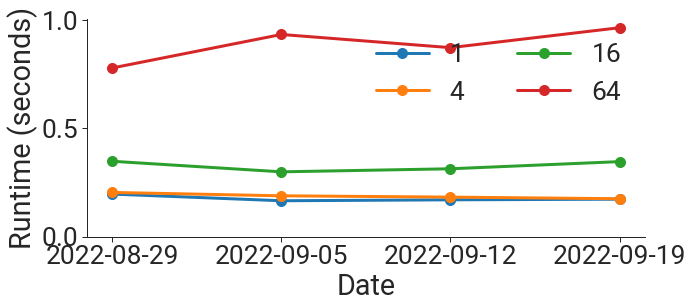

openai/text-davinci-001, 1024 input_tokens


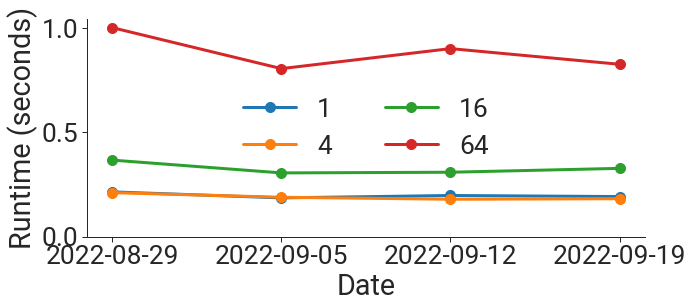

openai/text-davinci-001, 1536 input_tokens


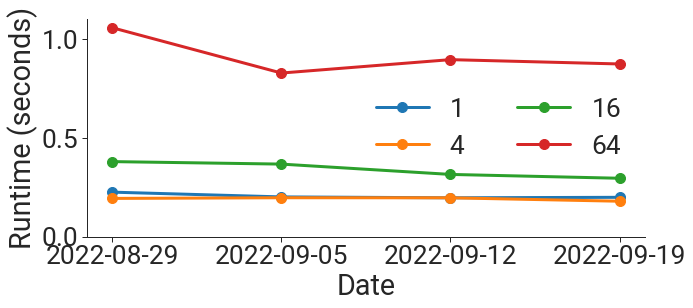

openai/text-curie-001, 1 input_tokens


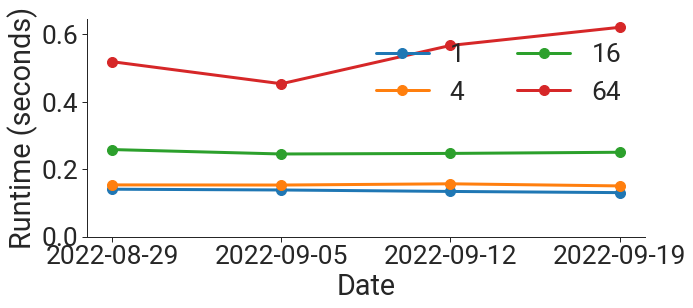

openai/text-curie-001, 256 input_tokens


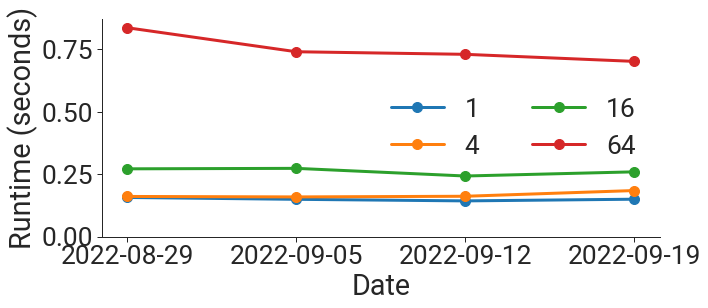

openai/text-curie-001, 512 input_tokens


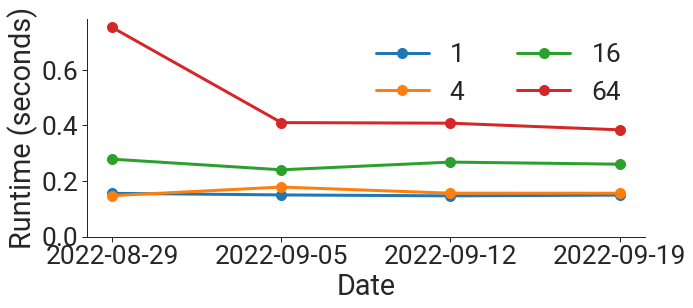

openai/text-curie-001, 1024 input_tokens


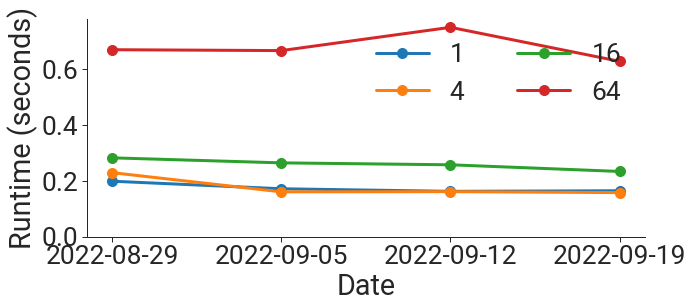

openai/text-curie-001, 1536 input_tokens


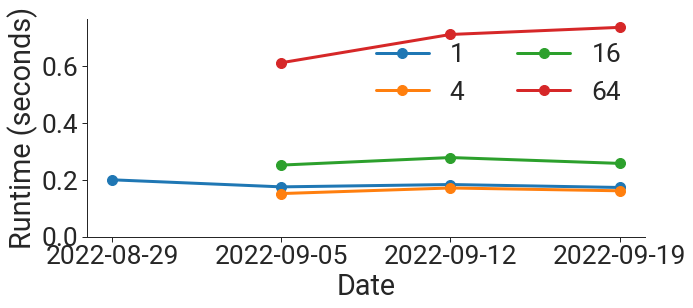

In [17]:
for model in data:
    for num_input_tokens in sorted(data[model].keys()):
        plt.figure(figsize=(10, 4))

        lines = []
        labels = []
        for num_output_tokens in [1, 4, 16, 64]:
            dates = sorted(data[model][num_input_tokens][num_output_tokens].keys())
            runtimes = [
                np.min(data[model][num_input_tokens][num_output_tokens][date])
                for date in dates
            ]
            label = f"{num_output_tokens}"
            lines.append(
                plt.plot(list(range(len(dates))), runtimes, label=label, marker="o")[0]
            )
            labels.append(label)
        plt.xticks(list(range(len(dates))), [str(date.date()) for date in dates])
        plt.xlabel("Date")
        plt.ylabel("Runtime (seconds)")
        plt.ylim(0, None)

        plt.legend(
            lines,
            labels,
            loc="best",
            frameon=False,
            ncol=2,
            columnspacing=None,
            labelspacing=None,
        )

        print(f"{model}, {num_input_tokens} input_tokens")
        sns.despine()

        plt.savefig(
            (f"../figures/runtimes_over_time/"
             f"model={model.replace('/', '_')},num_prompt_tokens={num_input_tokens}.pdf"),
            bbox_inches="tight",
        )
        
        plt.show()